In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** Engineer'
RANDOM_STATE = 1776

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# initialize DataFrame
df_new = pd.DataFrame(columns=['column'])

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/Clean_Heart.pkl")
df_label = pd.read_pickle("../Data/Clean_Label.pkl")
df_can = pd.read_pickle("../Data/Clean_CAN.pkl")
df_don = pd.read_pickle("../Data/Clean_DON.pkl")
df_both = pd.read_pickle("../Data/Clean_Both.pkl")
df_nominal = pd.read_pickle("../Data/Clean_Nominal.pkl")
df_ordinal = pd.read_pickle("../Data/Clean_Ordinal.pkl")
df_numeric = pd.read_pickle("../Data/Clean_Numeric.pkl")
df_object = pd.read_pickle("../Data/Clean_Object.pkl")
df_date = pd.read_pickle("../Data/Clean_Date.pkl")
df_dict = pd.read_pickle("../Data/Clean_Dictionary.pkl")
df_drop = pd.read_pickle("../Data/Clean_Drop.pkl")
df_unknown = pd.read_pickle("../Data/Clean_Unknown.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"Dictionary Features: {df_dict.shape[0]:,}")

Heart Dataset Rows: 27,494 & Columns: 261
Label Features: 15
Candidate Features: 132
Donor Features: 102
Date Features: 14
Both Features: 6
Object Features: 11
Numeric Features: 45
Ordinal Features: 21
Nominal Features: 169
Drop Features: 0
Unknown Features: 0
Dictionary Features: 302


In [4]:
# all label features
labelCols = df_label.column.to_list()

# display
df[labelCols].head()

,AcuteRejectionEpisode,AirwayDehiscencePostTransplant,StrokePostTransplant,PacemakerPostTransplant,DialysisPostDischarge,GraftFailStatus,GraftLifeSpanDay,LastFollowupNumber,GraftStatus,TransplantStatus,TransplantSurvivalDay,RecipientStatus,RejectionTreatmentWithinOneYear,FunctionalStatusFollowUp,LengthOfStay
0,No,No,No,No,Yes,Failure,329.0,999,No,Dead,329.0,Dead,No,"100% - Normal, no complaints, no evidence of disease",76.0
1,No,No,No,No,No,Success,2592.0,80,Yes,Alive,2592.0,Living,Missing,Unknown,10.0
2,No,No,No,No,No,Success,2913.0,80,Yes,Alive,2913.0,Living,No,Unknown,21.0
3,"Yes, at least one episode treated with anti-rejection agent",No,No,No,No,Failure,1225.0,999,No,Dead,1225.0,Dead,Yes,"30% - Severely disabled: hospitalization is indicated, death not imminent",32.0
4,No,No,No,No,No,Success,2785.0,80,Yes,Alive,2785.0,Living,No,Unknown,26.0


### Remove Unwanted Features

In [5]:
# all ordinal columns
removeCols = df_object.column.to_list()

# display
df[removeCols].head()

,VentricularDeviceTypeRegistration_CAN,VentricularDeviceTypeTransplant_CAN,VentricularDeviceBrandRegistration_CAN,VentricularDeviceBrandTransplant_CAN,PrimaryPaymentRegistration_CAN,PrimaryPaymentTransplant_CAN,DialysisTypeRegistration_CAN,CancerSite_DON,OtherMedsText1_DON,OtherMedsText2_DON,OtherMedsText3_DON
0,Lvad+Rvad,Lvad+Rvad,CentriMag (Thoratec/Levitronix),CentriMag (Thoratec/Levitronix),Public insurance - Medicaid,Public insurance - Medicaid,No dialysis,NO,"ZOSYN, VANCOMYCIN","KCL,","DOPAMINE, VASOPRESSIN,"
1,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare FFS (Fee for Service),Public insurance - Medicare FFS (Fee for Service),No dialysis,NO,"ANCEF, FENTANYL, VERSED,LASIX",NaN,NaN
2,None,None,Missing,Missing,Private insurance,Private insurance,No dialysis,NO,"ZOSYN, VANCOMYCIN","AMPHOTERICIN, BETADINE",ZANTAC
3,Lvad+Rvad,Lvad,CentriMag (Thoratec/Levitronix),Heartmate II,Public insurance - Medicare & Choice,Private insurance,No dialysis,"SKIN - SQUAMOUS, BASAL CELL","KCL, VANCO, MAG, ZOSYN","D50, DOPAMINE, DIFLUCAN",NaN
4,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare & Choice,Public insurance - Medicare & Choice,No dialysis,NO,"ROCURONIUM, VECURONIUM","ZOSYN, CIPROFLOXACIN","BUMETIDE, ANCEF"


In [6]:
# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 6 row(s) from df_can DataFrame.
Remove 4 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 11 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['CancerSite_DON', 'DialysisTypeRegistration_CAN', 'OtherMedsText1_DON', 'OtherMedsText2_DON', 'OtherMedsText3_DON', 'PrimaryPaymentRegistration_CAN', 'PrimaryPaymentTransplant_CAN', 'VentricularDeviceBrandRegistration_CAN', 'VentricularDeviceBrandTransplant_CAN', 'VentricularDeviceTypeRegistration_CAN', 'VentricularDeviceTypeTransplant_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 261
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 250


### ListingYear

In [7]:
uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
ListingYear,,,,,,,,
2011,664.0,1273.0,47.0,0.0,34.0,2018.0,32.903865,63.082260
2012,643.0,1438.0,32.0,0.0,35.0,2148.0,29.934823,66.945996
2013,620.0,1568.0,38.0,0.0,31.0,2257.0,27.470093,69.472751
2014,576.0,1791.0,26.0,0.0,26.0,2419.0,23.811492,74.038859
2015,512.0,1963.0,28.0,0.0,23.0,2526.0,20.269200,77.711797
2016,496.0,2112.0,13.0,0.0,17.0,2638.0,18.802123,80.060652
2017,436.0,2191.0,5.0,0.0,12.0,2644.0,16.490166,82.866868
2018,357.0,2363.0,4.0,3.0,24.0,2751.0,12.977099,85.896038
2019,358.0,2494.0,1.0,12.0,8.0,2873.0,12.460842,86.808214


#### Plot

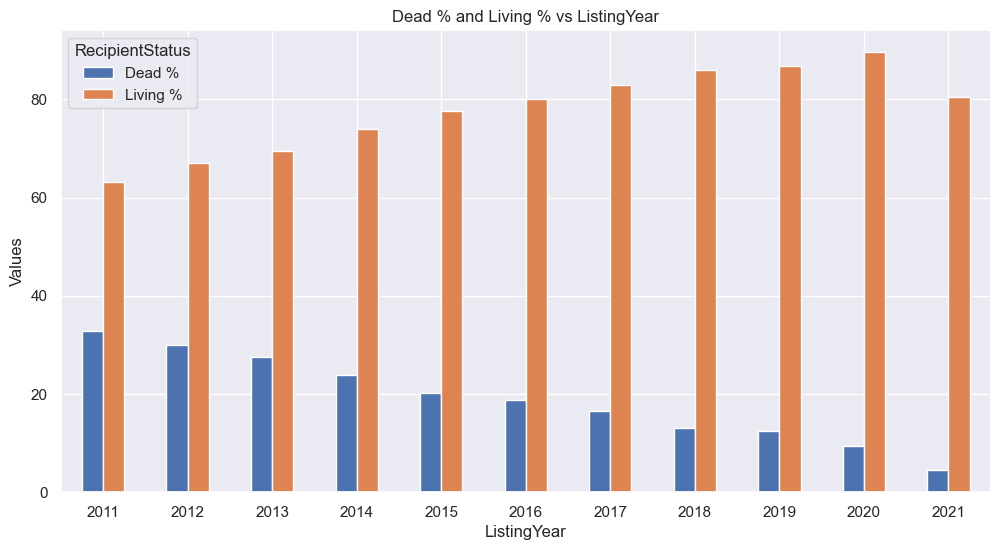

In [8]:
# get table into DataFrame
data = uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')
# exclude the last row
data = data.iloc[:-1]

# 'Dead %' or 'Living %'
data = data[['Dead %', 'Living %']]

# Plotting the bar plot
data.plot(kind='bar', figsize=(12,6))
plt.title('Dead % and Living % vs ListingYear')
plt.xlabel('ListingYear')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### Note: 2016, 2017, 2018, 2019, 2020, 2021 ONLY
- Let ONLY take Five years from 2020

In [9]:
df = df[df.ListingYear.isin([2016,2017,2018,2019,2020, 2021])].copy()

df.shape

(16126, 250)

In [10]:
# initialize list
removeCols = df_date.column.to_list()

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 7 row(s) from df_can DataFrame.
Remove 3 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 14 row(s) from df_date DataFrame.

Removed Features: ['AdmissionDate_CAN', 'AdmissionDate_DON', 'AllocationBeginDate_CAN', 'CenterDischargeDate_CAN', 'InitialWaitListDate_CAN', 'ListingYear', 'OrganRecoveryDate_DON', 'ReferralDate_DON', 'RemovalWaitListDate_CAN', 'StatusDate_CAN', 'TransplantDate_CAN', 'ValidationDateTCR_CAN', 'ValidationDateTCR_DDR', 'ValidationDateTRR_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 250
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 236


### User Function(s)

In [11]:
def getFeatureList(data, string):
    # initialize features and sort them alphabetically
    features = sorted(data.columns[data.columns.str.contains(string)].tolist())

    # display
    print(data[features].describe(include='all').T.to_string())
    print("\n:::: NaN Count:")
    print(data[features].isna().sum().sort_index().to_string())

    return features


### Wrangle Data

#### Remove Date & NaNs > 40%

In [12]:
# get NaNs
NaNsDF = uf.percentageNull(df)

# remove NaNs
removeCols = NaNsDF.index[NaNsDF.percentage > 40].to_list()

# append text fields
removeCols.extend(df_date.column.to_list())

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 4 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 1 row(s) from df_nominal DataFrame.
Remove 3 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Class1PRA_TransplantPercentage_CAN', 'Class2PRA_TransplantPercentage_CAN', 'PriorCardiacSurgeryTypeText_CAN', 'TotalSerumAlbuminRegistration_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 236
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 232


#### Numerical Features

In [13]:
print(sorted(df_numeric.column.to_list()))

['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'BMI_CAN', 'BMI_DON', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'CreatinineRegistration_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'DistanceFromDonorHospitaltoTXCenter', 'GraftLifeSpanDay', 'HeightCm_CAN', 'HeightCm_DON', 'Hematocrit_DON', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PA_MN_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegistration_SYS_CAN', 'HemodynamicsTransplant_CO_CAN', 'HemodynamicsTransplant_PA_DIA_CAN', 'HemodynamicsTransplant_PA_MN_CAN', 'HemodynamicsTransplant_PCW_CAN', 'HemodynamicsTransplant_SYS_CAN', 'IschemicTimeHour_DON', 'LV_EjectionFractionPercent_DON', 'LastFollowupNumber', 'LengthOfStay', 'Level_SGOT_ALT_DON', 'Level_SGOT_AST_DON', 'LungPO2_DON', 'LungPO2_FIO2_DON', 'OrganRecovery_PCO2_DON', 'TerminalTotalBilirubin_DON', 'TotalBilirubinTransplant_CAN', 'TotalDayWaitList_CAN', 'TransplantSurvivalDay', 

#### Age

In [14]:
# examine features
features = getFeatureList(df, 'Age_')

                   count       mean        std   min   25%   50%    75%   max
Age_CAN          16126.0  53.550229  12.917136  18.0  46.0  57.0  64.00  77.0
Age_DON          16126.0  32.261441  10.644595   8.0  24.0  31.0  39.75  70.0
Age_Listing_CAN  16126.0  53.165447  12.937125  15.0  46.0  56.0  63.00  77.0

:::: NaN Count:
Age_CAN            0
Age_DON            0
Age_Listing_CAN    0


In [15]:
# create new feature
df['Age_Difference_CanDon'] = df.Age_CAN - df.Age_DON
df['Age_Addition'] = df.Age_CAN + df.Age_DON

# initialize list
new = ['Age_Difference_CanDon', 'Age_Addition']
removeCols = ['Age_Listing_CAN']

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric = uf.insertIntoDataFrame(df_numeric, new)
df_new = uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)

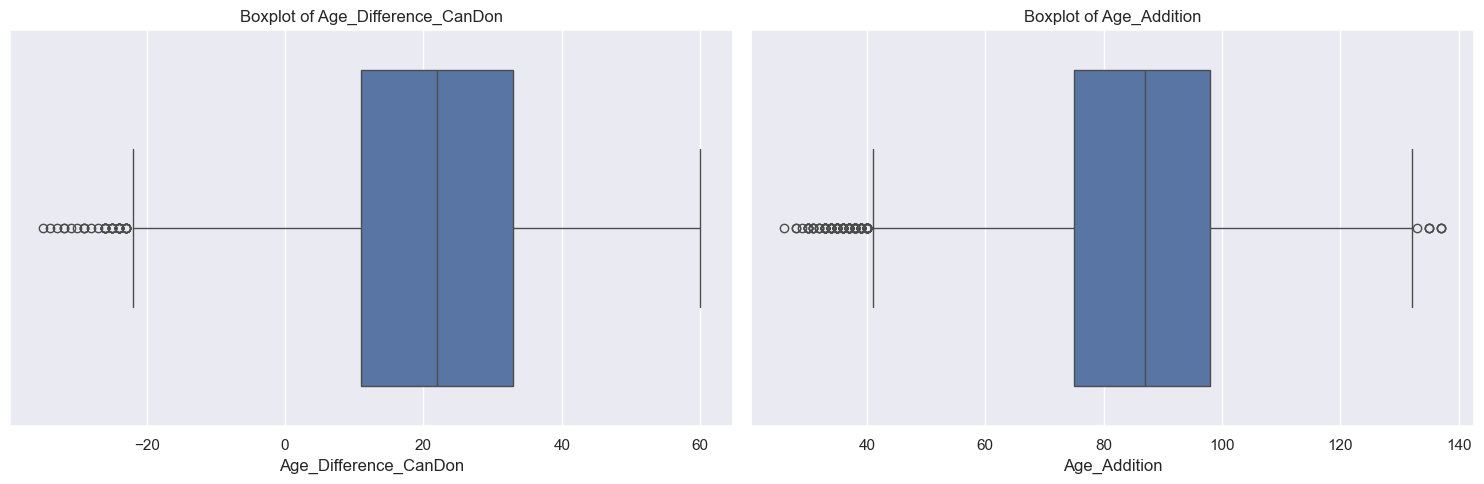

In [16]:
# boxplot
uv.plotBoxPlot(df, new, orientation='h')

#### BMI
##### The standard BMI ranges for adults are:
- Underweight: BMI less than 18.5 kg/m²
- Normal weight: BMI 18.5 to 24.9 kg/m²
- Overweight: BMI 25 to 29.9 kg/m²
- Obesity: BMI 30 kg/m² or greater

In [17]:
# examine features
features = getFeatureList(df, 'BMI_')

           count       mean       std        min       25%        50%        75%        max
BMI_CAN  16117.0  27.587758  4.885317  15.000000  24.00000  27.400000  31.200000  46.300000
BMI_DON  16123.0  27.752977  6.171520  14.351881  23.46458  26.647597  30.893529  74.360965

:::: NaN Count:
BMI_CAN    9
BMI_DON    3


In [18]:
# create new feature
df['BMI_Difference_CanDon'] = df.BMI_CAN - df.BMI_DON
df['BMI_Addition'] = df.BMI_CAN + df.BMI_DON

# initialize list
new = ['BMI_Difference_CanDon', 'BMI_Addition']

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric = uf.insertIntoDataFrame(df_numeric, new)
df_new = uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)

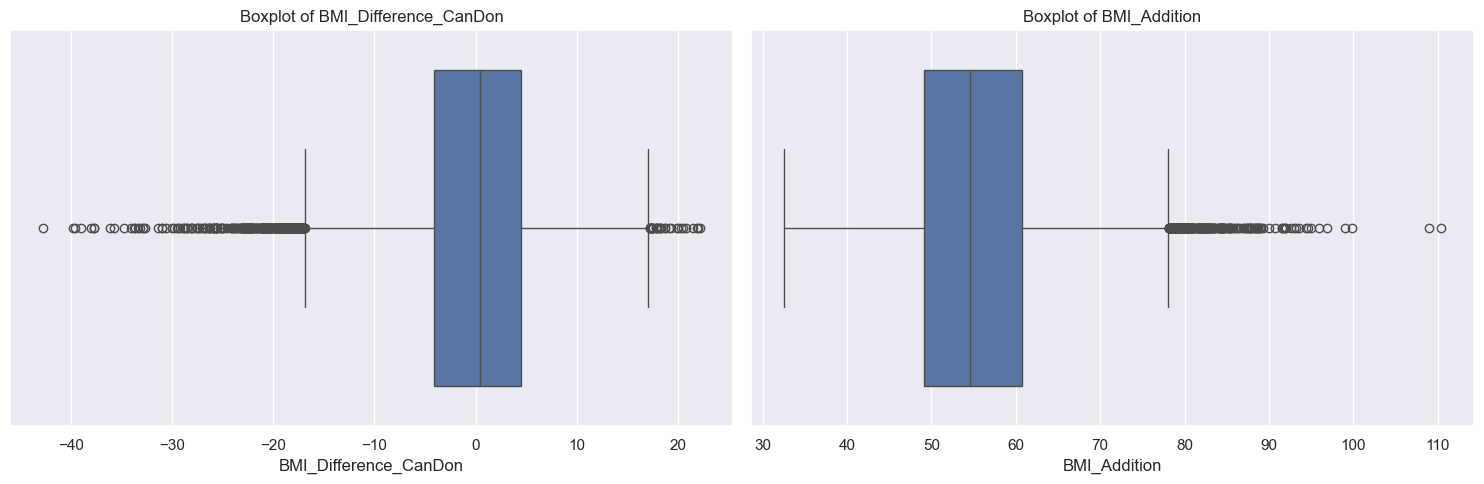

In [19]:
# boxplot
uv.plotBoxPlot(df, new, orientation='h')

#### BloodPH
- The normal blood pH range is indeed between 7.35 and 7.45. This slightly alkaline range is crucial for the proper functioning of enzymes and other biochemical reactions in the body.
    - A blood pH below 7.35 is considered acidic, and it can lead to a condition called acidosis. Acidosis can disrupt cellular functions and impair organ systems, particularly the cardiovascular and respiratory systems.
    - A blood pH above 7.45 is considered alkaline, and it can lead to a condition called alkalosis. Alkalosis can cause symptoms such as muscle twitching, hand tremors, and confusion.

In [20]:
# examine features
features = getFeatureList(df, 'BloodPH')

               count     mean       std   min   25%   50%   75%   max
BloodPH_DON  15913.0  7.41826  0.067307  5.57  7.38  7.42  7.46  7.93

:::: NaN Count:
BloodPH_DON    213


In [21]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
213,BloodPH_DON,DDR:Blood PH:,DDR,2004-06-30,NaT,CLINICAL INFORMATION,NUM,,,PH_DON,Numeric,


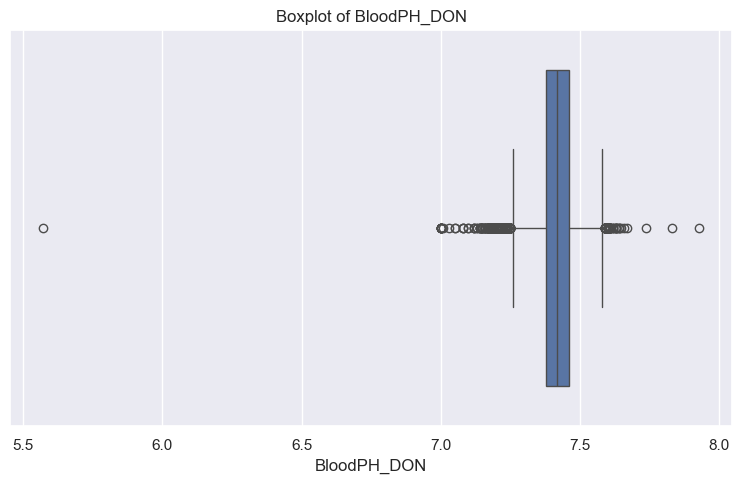

In [22]:
uv.plotBoxPlot(df, features, orientation='h')

#### BloodUreaNitrogenLevel
- Blood Urea Nitrogen (BUN) is a common blood test that measures the amount of urea nitrogen in the blood, which is a waste product formed from the breakdown of proteins.
    - Generally accepted range: 7 to 20 mg/dL (milligrams per deciliter).
    - Some sources report a slightly broader range of 6 to 24 mg/dL for adult men and 6 to 21 mg/dL for adult women. 

In [23]:
# examine features
features = getFeatureList(df, 'BloodUreaNitrogenLevel')

                              count       mean       std  min   25%   50%   75%    max
BloodUreaNitrogenLevel_DON  15934.0  26.985286  21.77062  1.0  14.0  20.0  32.0  250.0

:::: NaN Count:
BloodUreaNitrogenLevel_DON    192


In [24]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
21,BloodUreaNitrogenLevel_DON,DECEASED DONOR-TERMINAL BLOOD UREA NITROGEN,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,BUN_DON,Numeric,


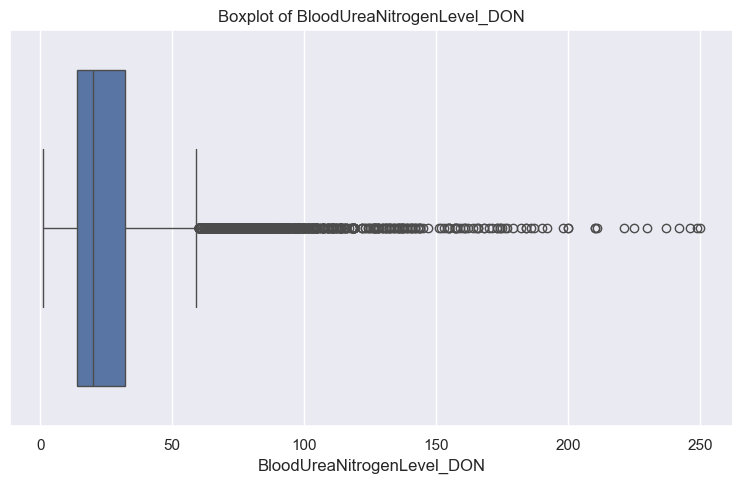

In [25]:
uv.plotBoxPlot(df, features, orientation='h')

#### CPRA
- CPRA (Calculated Panel Reactive Antibody) is a measure used to estimate the percentage of potential organ donors that a transplant candidate's immune system would react against due to preformed antibodies.
    - CPRA_Peak
        - The highest level of sensitization a patient has ever experienced.
        - Indicates the maximum percentage of potential donors that the patient's immune system would react against. This is crucial for understanding the patient's historical risk of rejection and their overall difficulty in finding a compatible donor.
    - CPRA_Recent
        - The most current level of sensitization.
        - Reflects the patient's current immune status and the percentage of potential donors they would currently react against. This is important for making immediate transplant decisions and assessing the current risk of rejection.
    - Key Differences:
        - Historical vs. Current: CPRA_Peak provides a historical maximum sensitization level, while CPRA_Recent gives the current sensitization level.
        - CPRA_Peak helps in understanding the worst-case scenario for donor compatibility, whereas CPRA_Recent is used for current transplant planning and risk assessment.

In [26]:
# examine features
features = getFeatureList(df, 'CPRA')

                   count       mean        std  min  25%  50%   75%    max
CPRA_Peak_CAN    12221.0  14.897144  26.561462  0.0  0.0  0.0  19.0  100.0
CPRA_Recent_CAN  12234.0  11.228462  23.407934  0.0  0.0  0.0   7.0  100.0

:::: NaN Count:
CPRA_Peak_CAN      3905
CPRA_Recent_CAN    3892


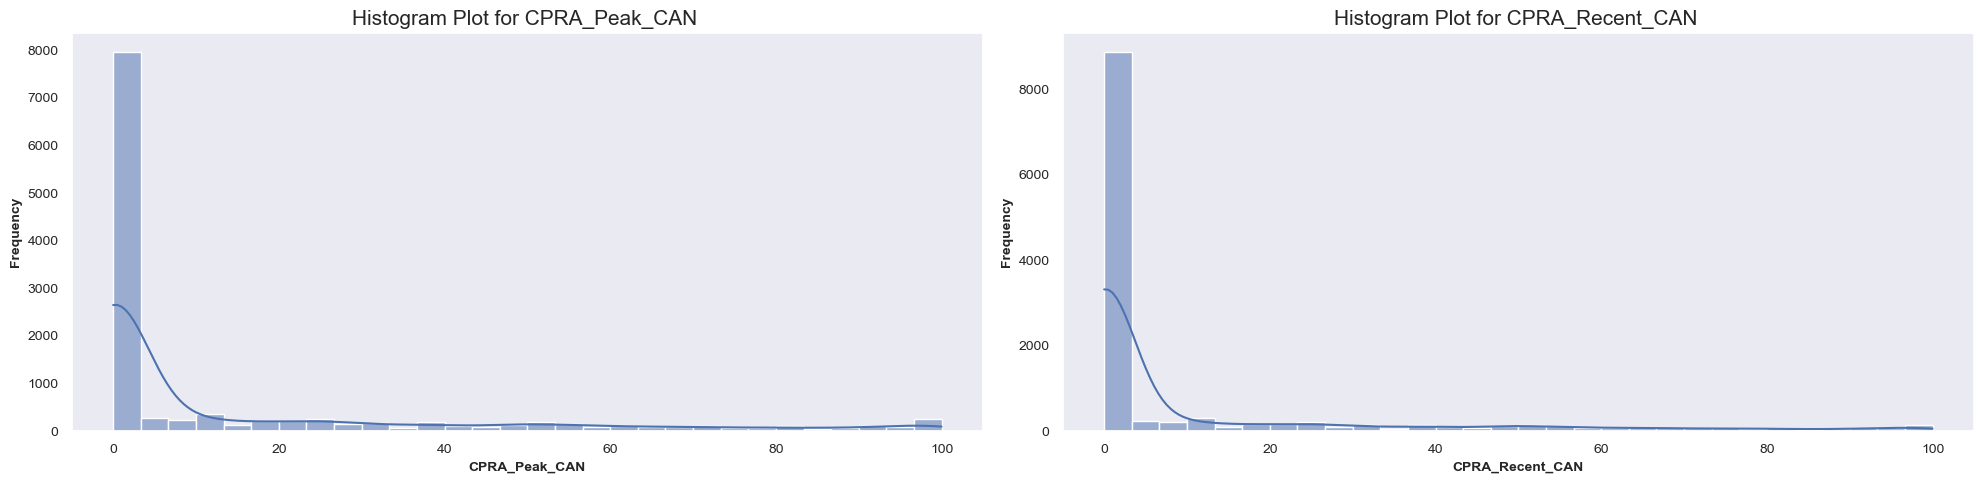

In [27]:
uv.histogramPlot(df, features)

##### A correlation of 0.90 indicates a high degree of similarity between the variables, though it's not a perfect one-to-one relationship. Creating an interaction term for highly correlated features can help capture the combined effect of these features in the model.

In [28]:
df[features].corr()

,CPRA_Peak_CAN,CPRA_Recent_CAN
CPRA_Peak_CAN,1.000000,0.901605
CPRA_Recent_CAN,0.901605,1.000000


In [29]:
# create new feature: add small constant to handle 0 values
df['PanelReactiveAntibody_CPRA_Interaction_CAN'] = (df.CPRA_Recent_CAN + 1e-5) * (df.CPRA_Peak_CAN + 1e-5)
# create new feature difference & addition between CPRA_Peak_CAN & CPRA_Recent_CAN
df['PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN'] = df.CPRA_Peak_CAN - df.CPRA_Recent_CAN
df['PanelReactiveAntibody_CPRA_Addition_CAN'] = df.CPRA_Peak_CAN + df.CPRA_Recent_CAN

# initialize list
new = ['PanelReactiveAntibody_CPRA_Interaction_CAN', 'PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN', 'PanelReactiveAntibody_CPRA_Addition_CAN']

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric = uf.insertIntoDataFrame(df_numeric, new)
df_new = uf.insertIntoDataFrame(df_new, new)
df_can = uf.insertIntoDataFrame(df_can, new)

In [30]:
df[(features + new)].corr()

,CPRA_Peak_CAN,CPRA_Recent_CAN,PanelReactiveAntibody_CPRA_Interaction_CAN,PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,PanelReactiveAntibody_CPRA_Addition_CAN
CPRA_Peak_CAN,1.000000,0.901605,0.873162,0.472142,0.978144
CPRA_Recent_CAN,0.901605,1.000000,0.956444,0.044374,0.971840
PanelReactiveAntibody_CPRA_Interaction_CAN,0.873162,0.956444,1.000000,0.067446,0.935409
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,0.472142,0.044374,0.067446,1.000000,0.278532
PanelReactiveAntibody_CPRA_Addition_CAN,0.978144,0.971840,0.935409,0.278532,1.000000


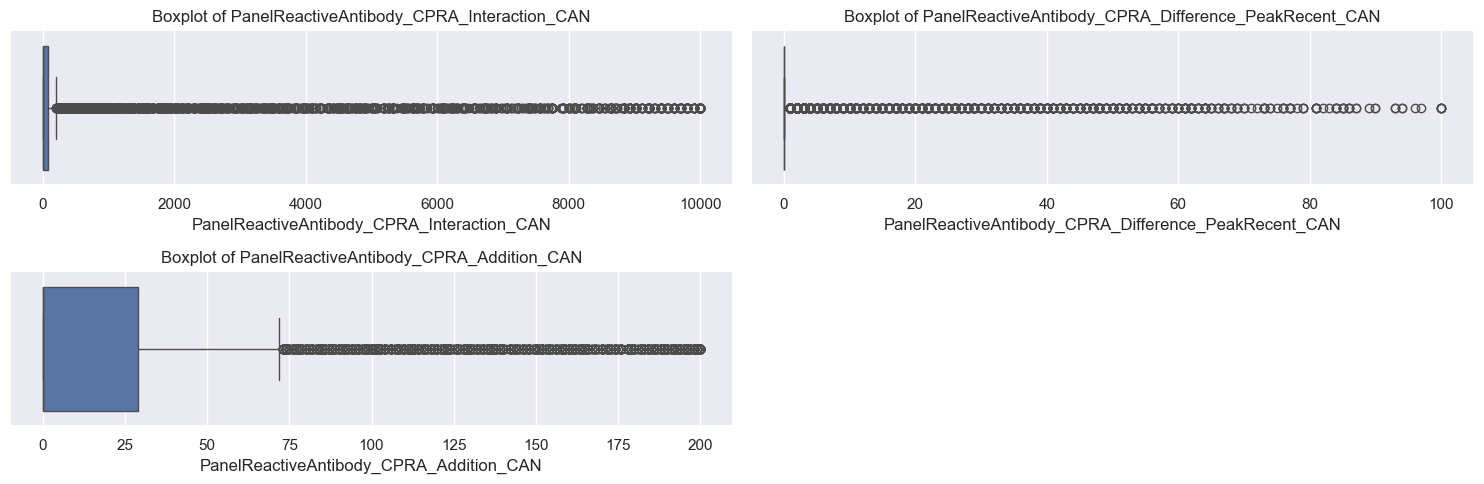

In [31]:
# boxplot
uv.plotBoxPlot(df, new, orientation='h')

#### Creatinine
- Creatinine levels can be affected by various health issues, including heart conditions. Generally, high creatinine levels are more common and often indicate that the kidneys are not functioning properly. This can be due to conditions such as chronic kidney disease, dehydration, or even heart failure. When the heart is not pumping efficiently, it can lead to reduced blood flow to the kidneys, causing an increase in creatinine levels.

In [32]:
# examine features
features = getFeatureList(df, 'Creatinine')

                              count      mean       std   min   25%   50%   75%   max
CreatinineRegistration_CAN  16016.0  1.386274  1.011872  0.08  0.95  1.20  1.50  24.0
CreatinineTransplant_CAN    15708.0  1.379902  1.060986  0.06  0.94  1.19  1.50  37.0
Creatinine_DON              15934.0  1.576678  1.668662  0.04  0.75  1.00  1.53  19.0

:::: NaN Count:
CreatinineRegistration_CAN    110
CreatinineTransplant_CAN      418
Creatinine_DON                192


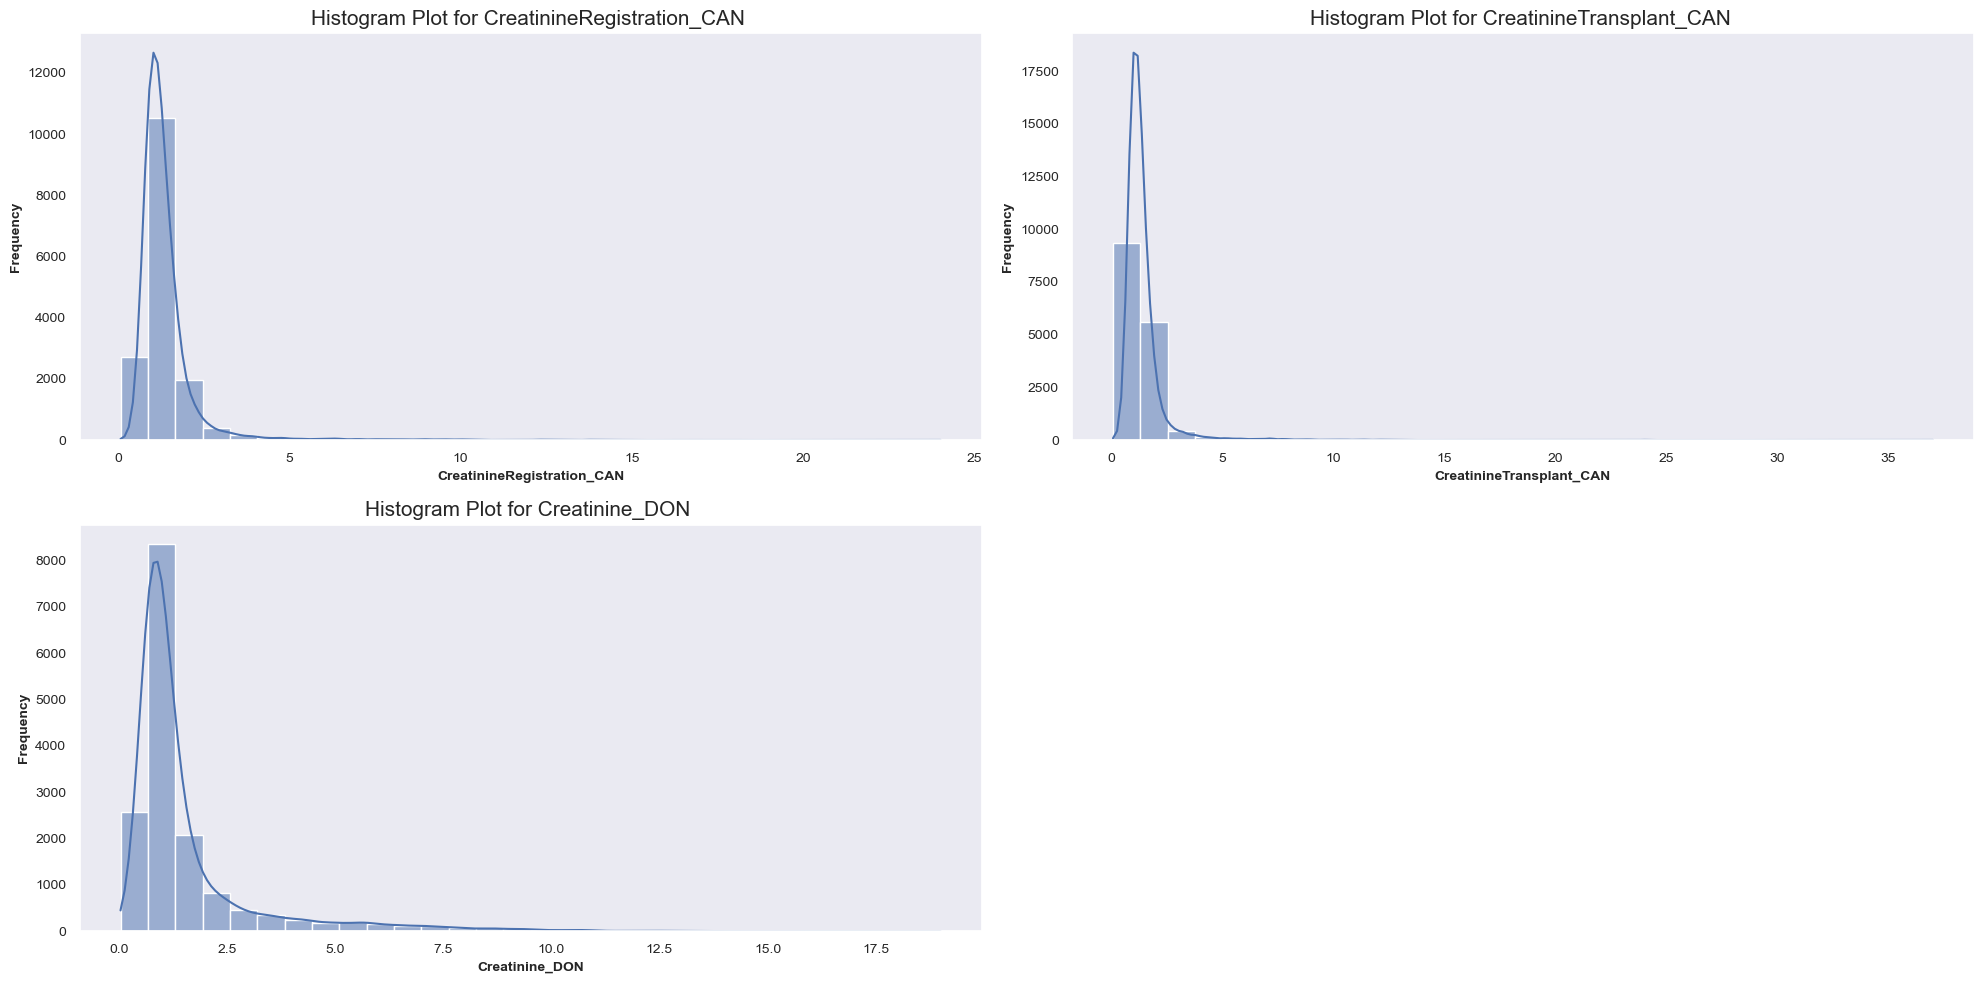

In [33]:
uv.histogramPlot(df, features)

In [34]:
df[features].corr()

,CreatinineRegistration_CAN,CreatinineTransplant_CAN,Creatinine_DON
CreatinineRegistration_CAN,1.000000,0.690318,-0.046011
CreatinineTransplant_CAN,0.690318,1.000000,-0.032917
Creatinine_DON,-0.046011,-0.032917,1.000000


In [35]:
# create new feature
df['Creatinine_Interaction_CAN'] = df.CreatinineRegistration_CAN * df.CreatinineTransplant_CAN
df['Creatinine_Difference_RT_CAN'] =  df.CreatinineRegistration_CAN - df.CreatinineTransplant_CAN
df['Creatinine_Addition_CAN'] =  df.CreatinineRegistration_CAN + df.CreatinineTransplant_CAN

# initialize list
new = ['Creatinine_Interaction_CAN','Creatinine_Difference_RT_CAN', 'Creatinine_Addition_CAN']

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric =  uf.insertIntoDataFrame(df_numeric, new)
df_new =  uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)
df_can = uf.insertIntoDataFrame(df_can, new)

In [36]:
df[features + new].corr()

,CreatinineRegistration_CAN,CreatinineTransplant_CAN,Creatinine_DON,Creatinine_Interaction_CAN,Creatinine_Difference_RT_CAN,Creatinine_Addition_CAN
CreatinineRegistration_CAN,1.000000,0.690318,-0.046011,0.763891,0.339019,0.915046
CreatinineTransplant_CAN,0.690318,1.000000,-0.032917,0.736747,-0.446628,0.923499
Creatinine_DON,-0.046011,-0.032917,1.000000,-0.030885,-0.014522,-0.042654
Creatinine_Interaction_CAN,0.763891,0.736747,-0.030885,1.000000,-0.013335,0.815745
Creatinine_Difference_RT_CAN,0.339019,-0.446628,-0.014522,-0.013335,1.000000,-0.069245
Creatinine_Addition_CAN,0.915046,0.923499,-0.042654,0.815745,-0.069245,1.000000


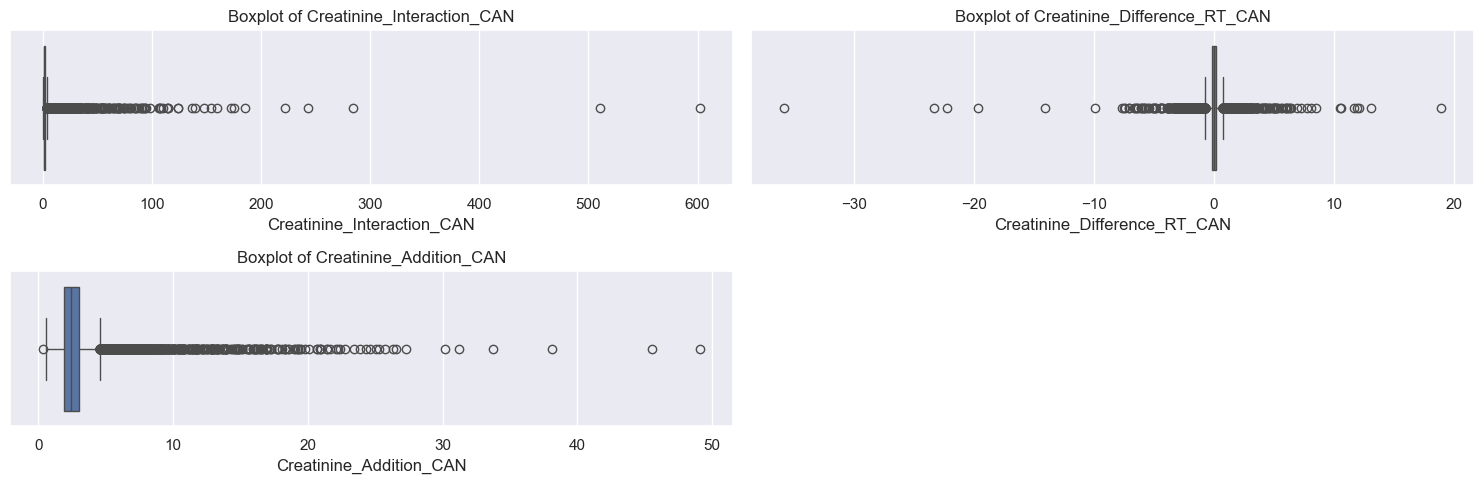

In [37]:
# boxplot
uv.plotBoxPlot(df, new, orientation='h')

#### DistanceFromDonorHospitaltoTXCenter

In [38]:
# examine features
features = getFeatureList(df, 'DistanceFromDonorHospitaltoTXCenter')

                                       count        mean         std  min   25%    50%    75%     max
DistanceFromDonorHospitaltoTXCenter  16126.0  227.235272  228.375988  0.0  38.0  168.0  356.0  2215.0

:::: NaN Count:
DistanceFromDonorHospitaltoTXCenter    0


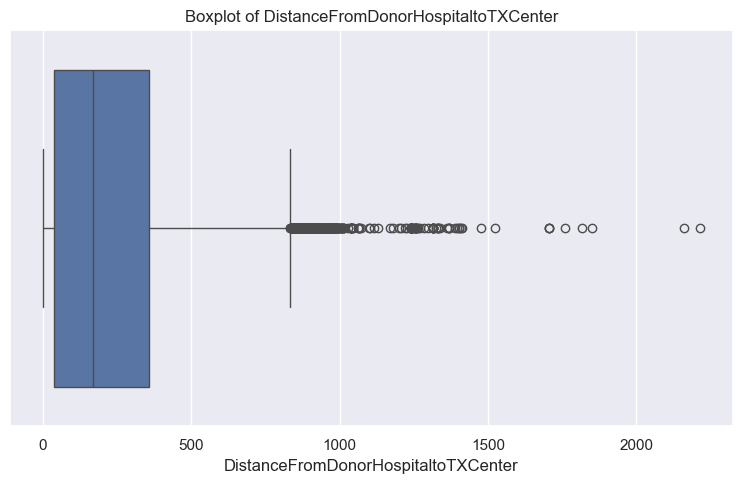

In [39]:
# boxplot
uv.plotBoxPlot(df, features, orientation='h')

#### HeightCm

In [40]:
# examine features
features = getFeatureList(df, 'HeightCm')

                count        mean        std    min    25%    50%    75%    max
HeightCm_CAN  16126.0  173.590308  10.064621  124.0  167.6  174.7  180.3  213.4
HeightCm_DON  16126.0  173.878222   9.495651  115.0  167.6  175.0  180.3  213.0

:::: NaN Count:
HeightCm_CAN    0
HeightCm_DON    0


In [41]:
# create new feature
df['HeightCm_Difference_CanDon'] = df.HeightCm_CAN - df.HeightCm_DON
df['HeightCm_Addition'] = df.HeightCm_CAN + df.HeightCm_DON

# initialize list
new = ['HeightCm_Difference_CanDon', 'HeightCm_Addition']

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric = uf.insertIntoDataFrame(df_numeric, new)
df_new = uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)

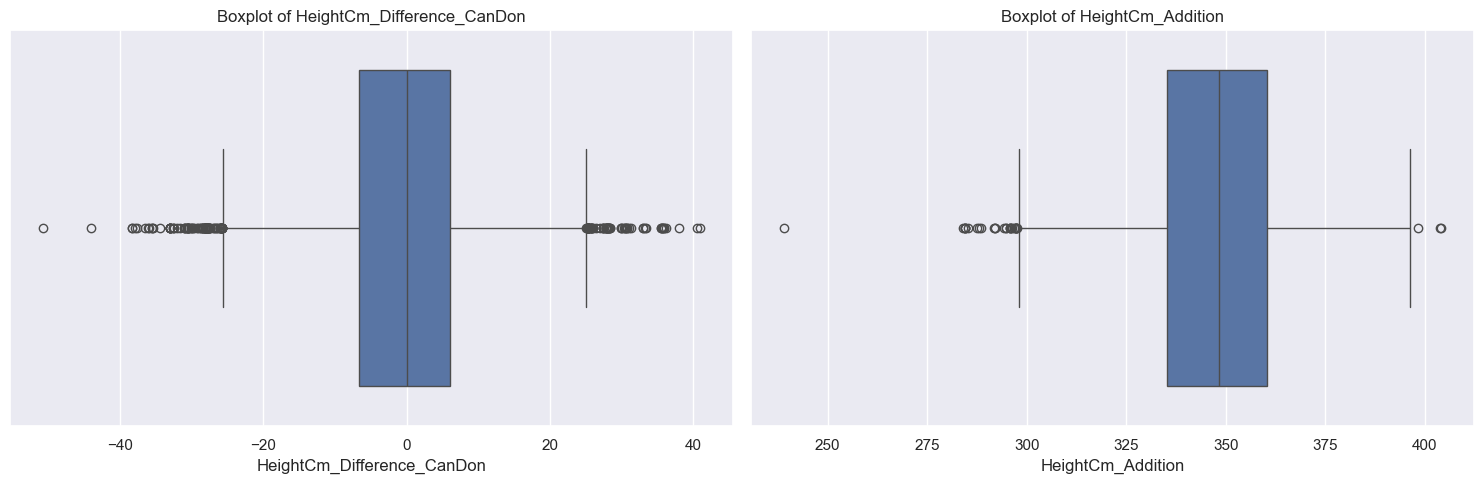

In [42]:
# boxplot
uv.plotBoxPlot(df, new, orientation='h')

#### Hematocrit
- Hematocrit is a blood test that measures the percentage of red blood cells (RBCs) in the total blood volume. It is an important indicator of overall health and can help diagnose various medical conditions.
    - Normal Hematocrit Ranges
        - Men: 38.3% to 48.6%
        - Women: 35.5% to 44.9% 

In [43]:
# examine features
features = getFeatureList(df, 'Hematocrit')

                  count       mean       std  min   25%   50%   75%   max
Hematocrit_DON  15934.0  28.123641  4.914255  2.5  24.7  27.6  31.0  75.0

:::: NaN Count:
Hematocrit_DON    192


In [44]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
127,Hematocrit_DON,DDR:Hematocrit:,DDR,2004-06-30,NaT,CLINICAL INFORMATION,NUM,,,HEMATOCRIT_DON,Numeric,


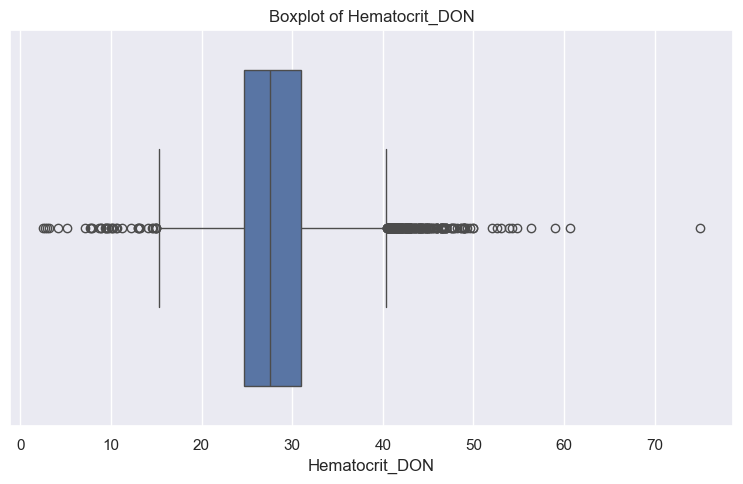

In [45]:
uv.plotBoxPlot(df, features, orientation='h')

#### Hemodynamics
- Hemodynamics refers to the study of blood flow and the forces involved in the circulatory system. It encompasses the physical principles governing blood movement through vessels and the heart, as well as the mechanics of blood flow and pressure regulation.
    - Here are some key ways hemodynamics can be affected:
        - Heart Failure: In heart failure, the heart's ability to pump blood effectively is compromised. This can lead to increased pressure in the heart and blood vessels, causing fluid buildup in the lungs and other tissues.
        - Valvular Heart Disease: Conditions like aortic stenosis or mitral regurgitation affect the flow of blood through the heart valves. This can lead to abnormal pressure gradients and changes in blood flow patterns, which can be detected through hemodynamic measurements.
        - Cardiomyopathies: These diseases affect the heart muscle, leading to changes in the heart's structure and function. Hemodynamic changes in cardiomyopathies can include altered cardiac output and increased filling pressures.
        - Hypertension: High blood pressure increases the workload on the heart, leading to changes in hemodynamics such as increased systemic vascular resistance and altered cardiac output1.
        - Pericardial Disease: Conditions like pericarditis or pericardial effusion can restrict the heart's movement, affecting hemodynamics by increasing pressures within the heart chambers and reducing cardiac output.

##### Hemodynamics 
- Hemodynamics_SYS_CAN: Systolic blood pressure. (mmHg)
- Hemodynamics_PA_DIA_CAN: Pulmonary artery diastolic pressure. (mmHg)
- Hemodynamics_PA_MN_CAN: Pulmonary artery mean pressure. (mmHg)
- Hemodynamics_PCW_CAN: Pulmonary capillary wedge pressure. (mmHg)
- Hemodynamics_CO_CAN: Cardiac output. (L/min)

In [46]:
# examine features
features = getFeatureList(df, 'Hemodynamics')

                                       count       mean        std   min    25%     50%   75%    max
HemodynamicsRegistration_CO_CAN      15240.0   4.244675   1.329615  0.45   3.31   4.100   5.0   14.4
HemodynamicsRegistration_PA_DIA_CAN  15528.0  20.181865   8.670702  0.00  14.00  20.000  26.0   91.0
HemodynamicsRegistration_PA_MN_CAN   15449.0  28.131113  10.162114  0.00  20.00  28.000  35.0   96.0
HemodynamicsRegistration_PCW_CAN     14667.0  18.748926   8.804931  0.00  12.00  18.000  25.0   50.0
HemodynamicsRegistration_SYS_CAN     15539.0  41.279426  14.194874  0.00  31.00  40.000  51.0  123.0
HemodynamicsTransplant_CO_CAN        15028.0   4.497855   1.455832  0.20   3.50   4.315   5.3   15.0
HemodynamicsTransplant_PA_DIA_CAN    15281.0  19.209149   8.484508  0.00  13.00  18.000  25.0  110.0
HemodynamicsTransplant_PA_MN_CAN     15140.0  26.995455   9.889409  0.00  20.00  26.000  34.0  110.0
HemodynamicsTransplant_PCW_CAN       14572.0  17.779592   8.664763  0.00  11.00  17.000  24

In [47]:
df[features].corr()

,HemodynamicsRegistration_CO_CAN,HemodynamicsRegistration_PA_DIA_CAN,HemodynamicsRegistration_PA_MN_CAN,HemodynamicsRegistration_PCW_CAN,HemodynamicsRegistration_SYS_CAN,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN
HemodynamicsRegistration_CO_CAN,1.000000,-0.210110,-0.185994,-0.235137,-0.144777,0.519670,-0.110408,-0.094517,-0.118516,-0.068845
HemodynamicsRegistration_PA_DIA_CAN,-0.210110,1.000000,0.898484,0.831375,0.788621,-0.086018,0.562250,0.551506,0.506624,0.497385
HemodynamicsRegistration_PA_MN_CAN,-0.185994,0.898484,1.000000,0.846415,0.921249,-0.064285,0.539686,0.597562,0.515785,0.574632
HemodynamicsRegistration_PCW_CAN,-0.235137,0.831375,0.846415,1.000000,0.769674,-0.093017,0.510869,0.534629,0.600482,0.491107
HemodynamicsRegistration_SYS_CAN,-0.144777,0.788621,0.921249,0.769674,1.000000,-0.043744,0.480709,0.569772,0.466845,0.612464
HemodynamicsTransplant_CO_CAN,0.519670,-0.086018,-0.064285,-0.093017,-0.043744,1.000000,-0.215733,-0.177631,-0.216821,-0.144156
HemodynamicsTransplant_PA_DIA_CAN,-0.110408,0.562250,0.539686,0.510869,0.480709,-0.215733,1.000000,0.904631,0.819392,0.794765
HemodynamicsTransplant_PA_MN_CAN,-0.094517,0.551506,0.597562,0.534629,0.569772,-0.177631,0.904631,1.000000,0.833690,0.925554
HemodynamicsTransplant_PCW_CAN,-0.118516,0.506624,0.515785,0.600482,0.466845,-0.216821,0.819392,0.833690,1.000000,0.761784
HemodynamicsTransplant_SYS_CAN,-0.068845,0.497385,0.574632,0.491107,0.612464,-0.144156,0.794765,0.925554,0.761784,1.000000


In [48]:
# examine features
featuresR = getFeatureList(df, 'HemodynamicsRegistration')

                                       count       mean        std   min    25%   50%   75%    max
HemodynamicsRegistration_CO_CAN      15240.0   4.244675   1.329615  0.45   3.31   4.1   5.0   14.4
HemodynamicsRegistration_PA_DIA_CAN  15528.0  20.181865   8.670702  0.00  14.00  20.0  26.0   91.0
HemodynamicsRegistration_PA_MN_CAN   15449.0  28.131113  10.162114  0.00  20.00  28.0  35.0   96.0
HemodynamicsRegistration_PCW_CAN     14667.0  18.748926   8.804931  0.00  12.00  18.0  25.0   50.0
HemodynamicsRegistration_SYS_CAN     15539.0  41.279426  14.194874  0.00  31.00  40.0  51.0  123.0

:::: NaN Count:
HemodynamicsRegistration_CO_CAN         886
HemodynamicsRegistration_PA_DIA_CAN     598
HemodynamicsRegistration_PA_MN_CAN      677
HemodynamicsRegistration_PCW_CAN       1459
HemodynamicsRegistration_SYS_CAN        587


In [49]:
df[featuresR].corr()

,HemodynamicsRegistration_CO_CAN,HemodynamicsRegistration_PA_DIA_CAN,HemodynamicsRegistration_PA_MN_CAN,HemodynamicsRegistration_PCW_CAN,HemodynamicsRegistration_SYS_CAN
HemodynamicsRegistration_CO_CAN,1.000000,-0.210110,-0.185994,-0.235137,-0.144777
HemodynamicsRegistration_PA_DIA_CAN,-0.210110,1.000000,0.898484,0.831375,0.788621
HemodynamicsRegistration_PA_MN_CAN,-0.185994,0.898484,1.000000,0.846415,0.921249
HemodynamicsRegistration_PCW_CAN,-0.235137,0.831375,0.846415,1.000000,0.769674
HemodynamicsRegistration_SYS_CAN,-0.144777,0.788621,0.921249,0.769674,1.000000


In [50]:
# create new feature: add small constant to handle 0 values
df['HemodynamicsRegistration_Interaction_CAN'] = (df.HemodynamicsRegistration_PA_DIA_CAN + 1e-5) * (df.HemodynamicsRegistration_PA_MN_CAN + 1e-5) * \
                                                 (df.HemodynamicsRegistration_PCW_CAN + 1e-5) * (df.HemodynamicsRegistration_SYS_CAN + 1e-5)

df['HemodynamicsRegistration_Addition_CAN'] = df.HemodynamicsRegistration_PA_DIA_CAN + df.HemodynamicsRegistration_PA_MN_CAN +  \
                                              df.HemodynamicsRegistration_PCW_CAN + df.HemodynamicsRegistration_SYS_CAN

# initialize list
new = ['HemodynamicsRegistration_Interaction_CAN', 'HemodynamicsRegistration_Addition_CAN']

In [51]:
# examine features
featuresT = getFeatureList(df, 'HemodynamicsTransplant')

                                     count       mean        std  min   25%     50%   75%    max
HemodynamicsTransplant_CO_CAN      15028.0   4.497855   1.455832  0.2   3.5   4.315   5.3   15.0
HemodynamicsTransplant_PA_DIA_CAN  15281.0  19.209149   8.484508  0.0  13.0  18.000  25.0  110.0
HemodynamicsTransplant_PA_MN_CAN   15140.0  26.995455   9.889409  0.0  20.0  26.000  34.0  110.0
HemodynamicsTransplant_PCW_CAN     14572.0  17.779592   8.664763  0.0  11.0  17.000  24.0   50.0
HemodynamicsTransplant_SYS_CAN     15289.0  39.632926  13.726242  0.0  29.0  38.000  48.0  158.0

:::: NaN Count:
HemodynamicsTransplant_CO_CAN        1098
HemodynamicsTransplant_PA_DIA_CAN     845
HemodynamicsTransplant_PA_MN_CAN      986
HemodynamicsTransplant_PCW_CAN       1554
HemodynamicsTransplant_SYS_CAN        837


In [52]:
df[featuresT].corr()

,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN
HemodynamicsTransplant_CO_CAN,1.000000,-0.215733,-0.177631,-0.216821,-0.144156
HemodynamicsTransplant_PA_DIA_CAN,-0.215733,1.000000,0.904631,0.819392,0.794765
HemodynamicsTransplant_PA_MN_CAN,-0.177631,0.904631,1.000000,0.833690,0.925554
HemodynamicsTransplant_PCW_CAN,-0.216821,0.819392,0.833690,1.000000,0.761784
HemodynamicsTransplant_SYS_CAN,-0.144156,0.794765,0.925554,0.761784,1.000000


In [53]:
# create new feature: add small constant to handle 0 values
df['HemodynamicsTransplant_Interaction_CAN'] = (df.HemodynamicsTransplant_PA_DIA_CAN + 1e-5) * (df.HemodynamicsTransplant_PA_MN_CAN + 1e-5) * \
                                                 (df.HemodynamicsTransplant_PCW_CAN + 1e-5) * (df.HemodynamicsTransplant_SYS_CAN + 1e-5)

df['HemodynamicsTransplant_Addition_CAN'] = df.HemodynamicsTransplant_PA_DIA_CAN + df.HemodynamicsTransplant_PA_MN_CAN +  \
                                            df.HemodynamicsTransplant_PCW_CAN + df.HemodynamicsTransplant_SYS_CAN

# add list
new.extend(['HemodynamicsTransplant_Interaction_CAN','HemodynamicsTransplant_Addition_CAN'])

In [54]:
# difference between Registration & Transplant
df['Hemodynamics_Difference_CO_RT_CAN'] = df.HemodynamicsRegistration_CO_CAN - df.HemodynamicsTransplant_CO_CAN
df['Hemodynamics_Difference_PA_DIA_RT_CAN'] = df.HemodynamicsRegistration_PA_DIA_CAN - df.HemodynamicsTransplant_PA_DIA_CAN
df['Hemodynamics_Difference_PA_MN_RT_CAN'] = df.HemodynamicsRegistration_PA_MN_CAN - df.HemodynamicsTransplant_PA_MN_CAN
df['Hemodynamics_Difference_PCW_RT_CAN'] = df.HemodynamicsRegistration_PA_MN_CAN - df.HemodynamicsTransplant_PCW_CAN
df['Hemodynamics_Difference_SYS_RT_CAN'] = df.HemodynamicsRegistration_SYS_CAN - df.HemodynamicsTransplant_SYS_CAN

# create new feature: add small constant to handle 0 values
df['Hemodynamics_Interaction_Difference_CAN'] = (df.Hemodynamics_Difference_PA_DIA_RT_CAN + 1e-5) * (df.Hemodynamics_Difference_PA_MN_RT_CAN + 1e-5) * \
                                                 (df.Hemodynamics_Difference_PCW_RT_CAN + 1e-5) * (df.Hemodynamics_Difference_SYS_RT_CAN + 1e-5)

df['Hemodynamics_Addition_Difference_CAN'] = df.Hemodynamics_Difference_PA_DIA_RT_CAN +  df.Hemodynamics_Difference_PA_MN_RT_CAN +  \
                                             df.Hemodynamics_Difference_PCW_RT_CAN +  df.Hemodynamics_Difference_SYS_RT_CAN

# initialize list
featuresD = ['Hemodynamics_Difference_CO_RT_CAN','Hemodynamics_Difference_PA_DIA_RT_CAN', 'Hemodynamics_Difference_PA_MN_RT_CAN',
             'Hemodynamics_Difference_PCW_RT_CAN','Hemodynamics_Difference_SYS_RT_CAN', 'Hemodynamics_Interaction_Difference_CAN', 'Hemodynamics_Addition_Difference_CAN']

# add list
new.extend(featuresD)

In [55]:
df[featuresD].corr()

,Hemodynamics_Difference_CO_RT_CAN,Hemodynamics_Difference_PA_DIA_RT_CAN,Hemodynamics_Difference_PA_MN_RT_CAN,Hemodynamics_Difference_PCW_RT_CAN,Hemodynamics_Difference_SYS_RT_CAN,Hemodynamics_Interaction_Difference_CAN,Hemodynamics_Addition_Difference_CAN
Hemodynamics_Difference_CO_RT_CAN,1.000000,-0.250694,-0.235200,-0.229338,-0.204823,-0.019925,-0.254692
Hemodynamics_Difference_PA_DIA_RT_CAN,-0.250694,1.000000,0.844606,0.727134,0.735390,0.113554,0.885510
Hemodynamics_Difference_PA_MN_RT_CAN,-0.235200,0.844606,1.000000,0.820816,0.888919,0.134385,0.966067
Hemodynamics_Difference_PCW_RT_CAN,-0.229338,0.727134,0.820816,1.000000,0.743735,0.160324,0.891478
Hemodynamics_Difference_SYS_RT_CAN,-0.204823,0.735390,0.888919,0.743735,1.000000,0.117541,0.931968
Hemodynamics_Interaction_Difference_CAN,-0.019925,0.113554,0.134385,0.160324,0.117541,1.000000,0.142399
Hemodynamics_Addition_Difference_CAN,-0.254692,0.885510,0.966067,0.891478,0.931968,0.142399,1.000000


In [56]:
# remove CO
featuresR.remove('HemodynamicsRegistration_CO_CAN')
featuresT.remove('HemodynamicsTransplant_CO_CAN')
# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, featuresR)
df_drop  = uf.insertIntoDataFrame(df_drop, featuresT)
df_numeric =  uf.insertIntoDataFrame(df_numeric, new)
df_new =  uf.insertIntoDataFrame(df_new, new)
df_can = uf.insertIntoDataFrame(df_can, new)

#### IschemicTimeHour
- Ischemic time refers to the period during which an organ or tissue is deprived of blood supply and, consequently, oxygen. This concept is crucial in various medical contexts, particularly in transplantation and acute medical conditions like strokes and heart attacks.
    - Importance in Transplantation
        - Kidney: Optimal cold ischemic time is less than 20 hours, with suboptimal times extending beyond 36 hours.
        - Liver: Optimal cold ischemic time is less than 10 hours.
        - Heart: Optimal cold ischemic time is less than 4 hours.
        - Lung: Optimal cold ischemic time is less than 8 hours1.
    - Clinical Implications
        - Prolonged ischemic times can lead to greater tissue damage and delayed organ function.
        - Shorter ischemic times are associated with better transplant outcomes and long-term success

In [57]:
# examine features
features = getFeatureList(df, 'IschemicTimeHour_DON')

                        count      mean       std  min  25%  50%  75%   max
IschemicTimeHour_DON  15630.0  3.294421  1.088193  0.3  2.6  3.3  3.9  12.0

:::: NaN Count:
IschemicTimeHour_DON    496


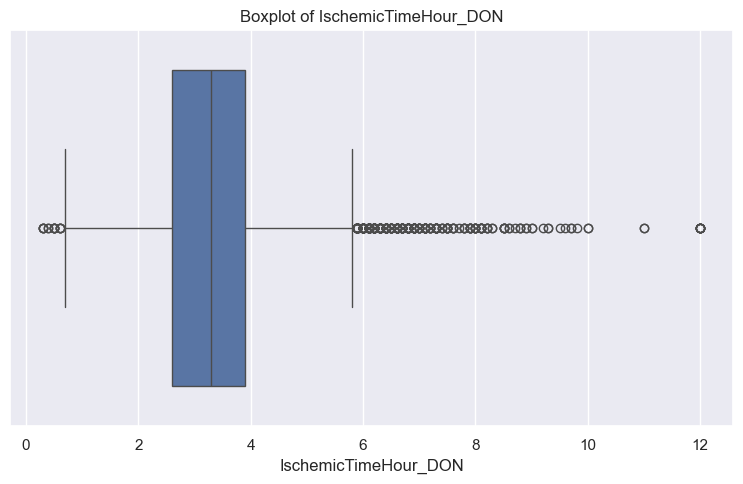

In [58]:
uv.plotBoxPlot(df, features)

#### LV_EjectionFractionPercent
- Left ventricular ejection fraction (LVEF) is a critical measurement used to assess the function of the heart, particularly in the context of organ donation and transplantation. It represents the percentage of blood that is pumped out of the left ventricle with each heartbeat.
    - Normal LVEF: Typically, a normal ejection fraction is between 50% and 70%.
    - Mildly Reduced LVEF: Values between 41% and 49% may indicate mild dysfunction.
    - Reduced LVEF: An LVEF less than 40% is often considered significantly reduced and may be a contraindication for organ donation, although recent studies suggest that donor hearts with reduced LVEF can still be viable for transplantation under certain conditions.

In [59]:
# examine features
features = getFeatureList(df, 'LV_EjectionFractionPercent')

                                  count       mean       std   min   25%   50%   75%   max
LV_EjectionFractionPercent_DON  16109.0  61.614332  6.598243  10.0  56.0  60.0  65.0  96.0

:::: NaN Count:
LV_EjectionFractionPercent_DON    17


In [60]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
195,LV_EjectionFractionPercent_DON,DECEASED DONOR LV EJECTION FRACTION %,DDR,1999-10-25,NaT,HEART DONOR'S CARDIAC FUNCTION,NUM,,,LV_EJECT,Numeric,


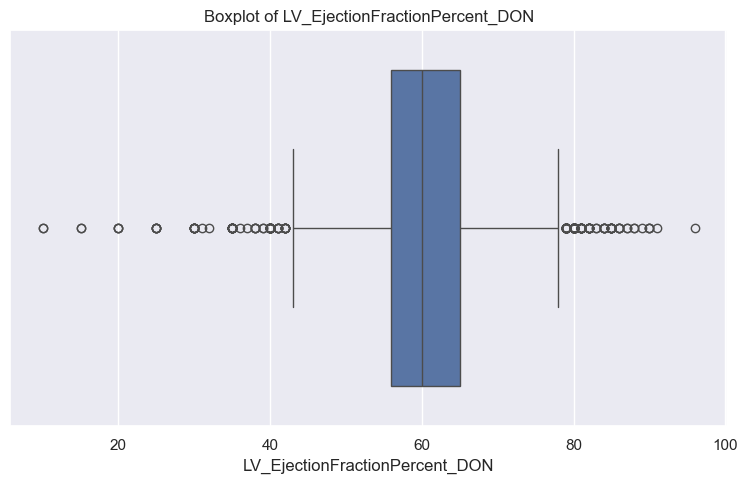

In [61]:
uv.plotBoxPlot(df, features, orientation='h')

#### Level_SGOT
- SGOT (AST) and ALT (DON) are enzymes that are commonly measured to assess liver health:
    - SGOT (AST): Also known as aspartate aminotransferase (AST), this enzyme is found in various tissues, including the liver, heart, muscles, and kidneys. It plays a role in amino acid metabolism. Elevated levels of AST in the blood can indicate liver damage, heart problems, or muscle injury.
        - Conservative normal range of 8 to 45 units/L for healthy individuals. 
    - SGOT (ALT): Also known as alanine aminotransferase (ALT), this enzyme is primarily found in the liver. It helps convert proteins into energy for liver cells. High levels of ALT are more specific to liver damage compared to AST.
        - The typical normal range for ALT is approximately 7 to 56 units per liter (U/L) of serum. However, ranges may vary slightly between laboratories. 

In [62]:
# examine features
features = getFeatureList(df, 'Level_SGOT')

                      count        mean         std  min   25%   50%   75%      max
Level_SGOT_ALT_DON  15933.0  121.348710  471.772351  3.0  24.0  42.0  88.0  44117.0
Level_SGOT_AST_DON  15933.0  100.836377  299.238169  0.4  25.0  44.0  88.0  10196.0

:::: NaN Count:
Level_SGOT_ALT_DON    193
Level_SGOT_AST_DON    193


In [63]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
259,Level_SGOT_AST_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGOT_DON,Numeric,
260,Level_SGOT_ALT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGPT_DON,Numeric,


In [64]:
df[features].corr()

,Level_SGOT_ALT_DON,Level_SGOT_AST_DON
Level_SGOT_ALT_DON,1.000000,0.483167
Level_SGOT_AST_DON,0.483167,1.000000


##### Addition can help you understand the combined enzyme activity. Capturing the overall level of these enzymes might be helpful.

In [65]:
# new feature
df['Level_SGOT_Difference_AltAst_DON'] = df.Level_SGOT_ALT_DON - df.Level_SGOT_AST_DON
df['Level_SGOT_Addition_DON'] = df.Level_SGOT_ALT_DON + df.Level_SGOT_AST_DON

# initialize list
new = ['Level_SGOT_Difference_AltAst_DON', 'Level_SGOT_Addition_DON']

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric =  uf.insertIntoDataFrame(df_numeric, new)
df_new =  uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)
df_don = uf.insertIntoDataFrame(df_don, new)

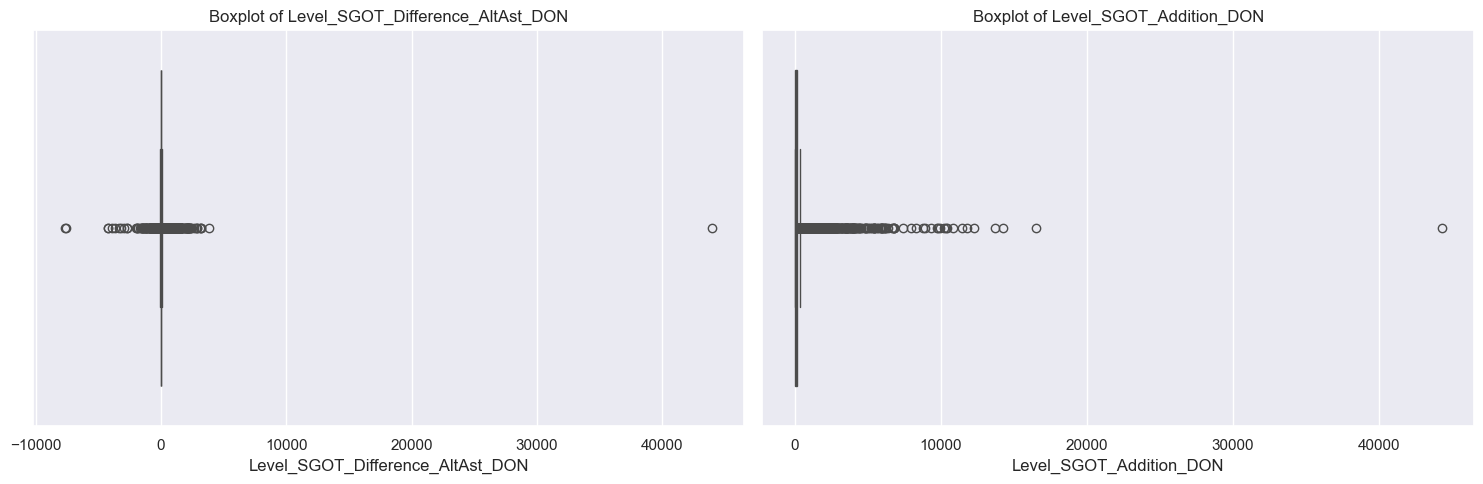

In [66]:
uv.plotBoxPlot(df, new, orientation='h')

#### LungPO2
- Lung PO2 (Partial Pressure of Oxygen) is a measure of the pressure exerted by oxygen in the lungs. It is an important indicator of how well oxygen is being transferred from the air in the lungs to the blood. The value of PO2 is typically measured in millimeters of mercury (mmHg) and provides insight into the efficiency of the respiratory system. In clinical and transplant contexts, particularly with donors, it helps assess the oxygenation status of the donor’s lungs, which is critical when evaluating organs for transplantation. `LungPO2_DON`: PO2 on 100% oxygen refers to the partial pressure of oxygen in arterial blood when a patient is breathing 100% oxygen.

- The Fraction of Inspired Oxygen (Lung FIO2) refers to the concentration of oxygen in the air that is being inhaled by a patient. It is a critical parameter in managing patients with respiratory distress and is often expressed as a percentage or as a decimal. `LungPO2_FIO2_DON`: Lung pO2 on FiO2 refers to the partial pressure of oxygen in arterial blood (PaO2) in relation to the fraction of inspired oxygen (FiO2).
    - Normal Range for FIO2
        - Room Air: The FIO2 in room air is approximately 21% or 0.21 as a decimal.
    - Supplemental Oxygen:
        - Low-Flow Oxygen Therapy: FIO2 can range from about 24% (0.24) to 40% (0.40), depending on the delivery device (e.g., nasal cannula, simple face mask).
        - High-Flow Oxygen Therapy: FIO2 can be set between 40% (0.40) and 100% (1.0), especially in more controlled environments like intensive care units.<br><br>

- The partial pressure of oxygen (PO2) levels can significantly impact heart conditions.
    - Low PO2 levels, or hypoxemia, can lead to insufficient oxygen in the blood, which stresses the heart as it works harder to supply oxygen to tissues1. This can exacerbate conditions like congestive heart failure.
    - To compensate for low oxygen levels, the heart may increase its rate and output, which can strain the heart over time2.
    - Even if blood oxygenation appears normal, poor cardiac output can result in inadequate oxygen delivery to tissues, leading to hypoxia. This can cause symptoms like chest pain, shortness of breath, and fatigue.
    - Interestingly, higher bilirubin levels, which can be influenced by PO2, have been associated with a reduced risk of cardiovascular diseases due to their antioxidant properties.

In [67]:
# examine features
features = getFeatureList(df, 'LungPO2')

                    count unique      top   freq        mean        std   min    25%    50%    75%    max
LungPO2_DON       15925.0    NaN      NaN    NaN  283.164678  160.90498  12.0  130.0  266.0  430.0  698.0
LungPO2_Done_DON    16126      1  Missing  16126         NaN        NaN   NaN    NaN    NaN    NaN    NaN
LungPO2_FIO2_DON  15867.0    NaN      NaN    NaN   82.398374  25.355015   6.0   60.0  100.0  100.0  100.0

:::: NaN Count:
LungPO2_DON         201
LungPO2_Done_DON      0
LungPO2_FIO2_DON    259


In [68]:
df.LungPO2_Done_DON.value_counts(dropna=False)

LungPO2_Done_DON
Missing    16126
No             0
Yes            0
Name: count, dtype: int64

In [69]:
# remove feature
removeCols.extend(['LungPO2_Done_DON'])
features.remove('LungPO2_Done_DON')

In [70]:
df[features].corr()

,LungPO2_DON,LungPO2_FIO2_DON
LungPO2_DON,1.000000,0.630873
LungPO2_FIO2_DON,0.630873,1.000000


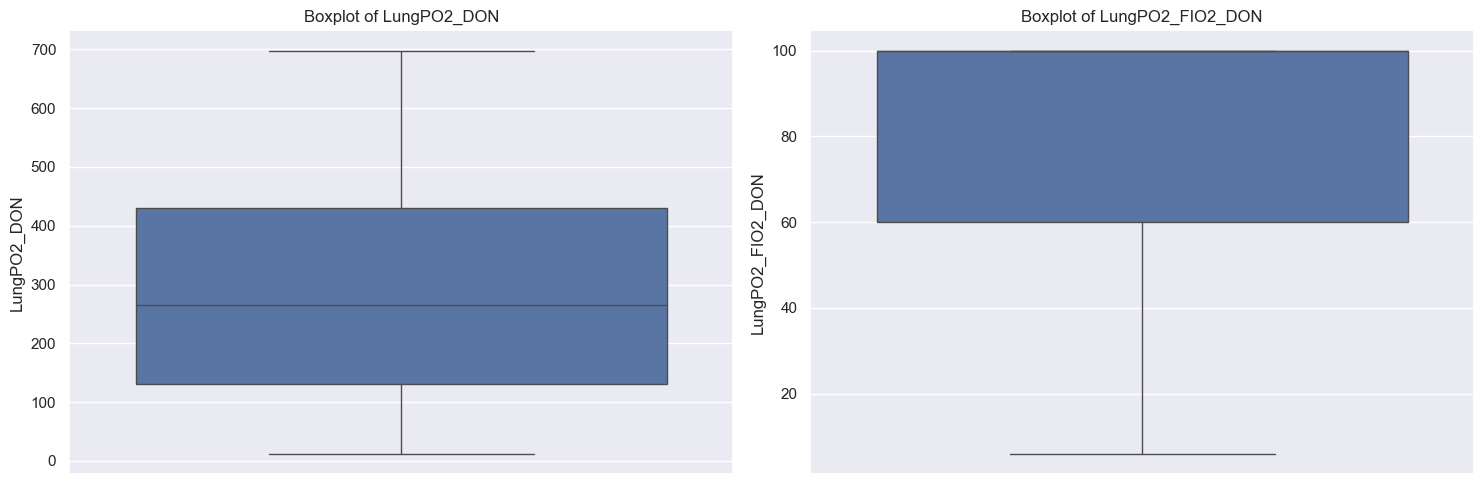

In [71]:
uv.plotBoxPlot(df, features, orientation='v')

#### OrganRecovery
- Normal `PCO2` Levels: The normal range for arterial blood `PCO2` is 35 to 45 mmHg (millimeters of mercury) or 4.7 to 6.0 kPa

In [72]:
# examine features
features = getFeatureList(df, 'OrganRecovery')

                          count       mean       std   min   25%   50%   75%    max
OrganRecovery_PCO2_DON  15909.0  39.239164  7.029899  10.1  35.0  38.7  43.0  106.0

:::: NaN Count:
OrganRecovery_PCO2_DON    217


In [73]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
208,OrganRecovery_PCO2_DON,DDR:pCO2:,DDR,2004-06-30,NaT,ORGAN RECOVERY,NUM,,,PCO2_DON,Numeric,Maintaining appropriate PCO2 levels is crucial for preserving organ function and optimizing outcomes in transplantation.


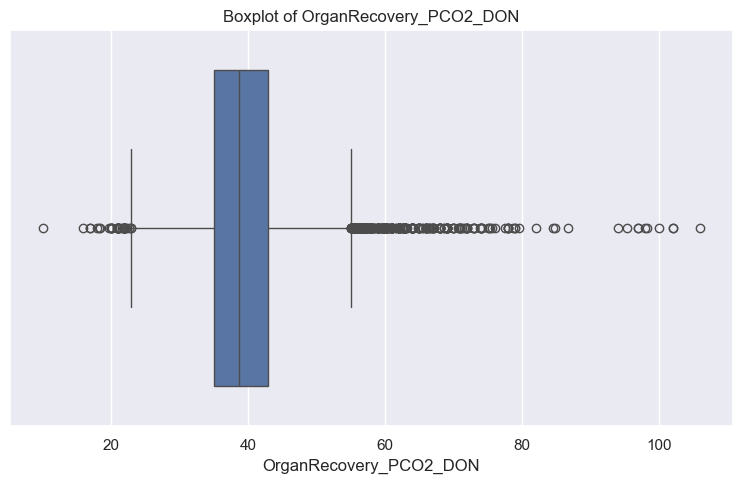

In [74]:
uv.plotBoxPlot(df, features, orientation='h')

#### Total Bilirubin
- Heart conditions can indeed influence total bilirubin levels, though the relationship is complex. Generally, higher bilirubin levels have been associated with a reduced risk of cardiovascular diseases (CVD). This is because bilirubin has antioxidant properties that may protect against oxidative stress and inflammation, which are key factors in the development of CVD. However, certain heart conditions, especially those that affect liver function or blood flow, could potentially lead to changes in bilirubin levels. For example, congestive heart failure can cause liver congestion, which might impair the liver's ability to process bilirubin, potentially leading to elevated levels.
- Bilirubin is a clinical measurement that evaluates the combined levels of direct (conjugated) and indirect (unconjugated) bilirubin in the blood. It is an important diagnostic marker for liver function, bile duct health, and conditions like jaundice.

In [75]:
# examine features
features = getFeatureList(df, 'Bilirubin')

                                count      mean       std  min  25%  50%  75%   max
TerminalTotalBilirubin_DON    15933.0  1.037188  1.467089  0.0  0.5  0.7  1.1  45.4
TotalBilirubinTransplant_CAN  15696.0  1.002722  1.921291  0.1  0.5  0.7  1.1  80.0

:::: NaN Count:
TerminalTotalBilirubin_DON      193
TotalBilirubinTransplant_CAN    430


In [76]:
# new feature
df['TotalBilirubin_Difference_CanDon'] = df.TotalBilirubinTransplant_CAN - df.TerminalTotalBilirubin_DON
df['TotalBilirubin_Addition'] = df.TotalBilirubinTransplant_CAN + df.TerminalTotalBilirubin_DON

# initialize list
new = ['TotalBilirubin_Difference_CanDon','TotalBilirubin_Addition']

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric =  uf.insertIntoDataFrame(df_numeric, new)
df_new =  uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)

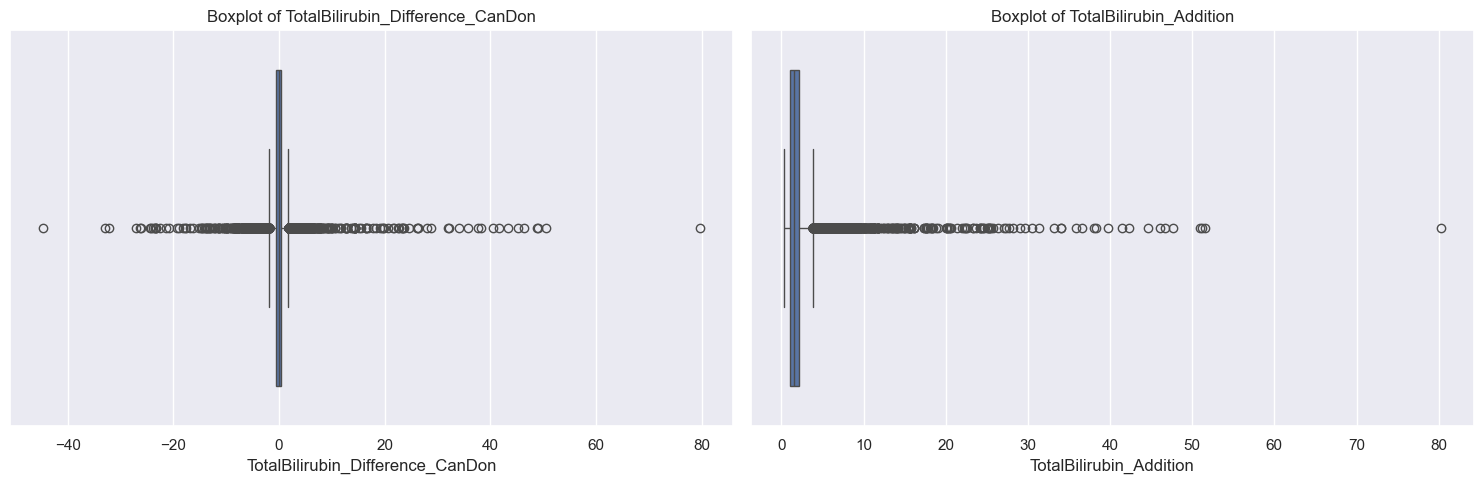

In [77]:
uv.plotBoxPlot(df, new, orientation='h')

#### TotalDayWaitList

In [78]:
# examine features
features = getFeatureList(df, 'TotalDayWaitList')

                        count        mean         std  min   25%   50%    75%     max
TotalDayWaitList_CAN  16126.0  140.163277  229.090503  0.0  13.0  44.0  163.0  2078.0

:::: NaN Count:
TotalDayWaitList_CAN    0


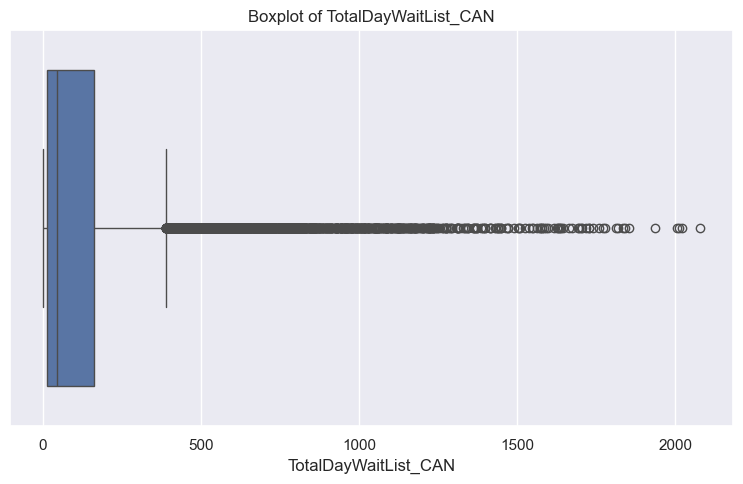

In [79]:
uv.plotBoxPlot(df, features, orientation='h')

#### WeightKg

In [80]:
# examine features
features = getFeatureList(df, 'WeightKg')

                count       mean        std   min   25%   50%   75%    max
WeightKg_CAN  16121.0  83.545630  18.186947  32.5  70.6  82.6  95.7  159.1
WeightKg_DON  16125.0  83.932025  19.742471  23.2  70.0  81.0  95.0  196.9

:::: NaN Count:
WeightKg_CAN    5
WeightKg_DON    1


In [81]:
# new feature
df['WeightKg_Difference_CanDon'] = df.WeightKg_CAN - df.WeightKg_DON
df['WeightKg_Addition'] = df.WeightKg_CAN + df.WeightKg_DON

# initialize list
new = ['WeightKg_Difference_CanDon', 'WeightKg_Addition']

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_numeric =  uf.insertIntoDataFrame(df_numeric, new)
df_new =  uf.insertIntoDataFrame(df_new, new)
df_both = uf.insertIntoDataFrame(df_both, new)

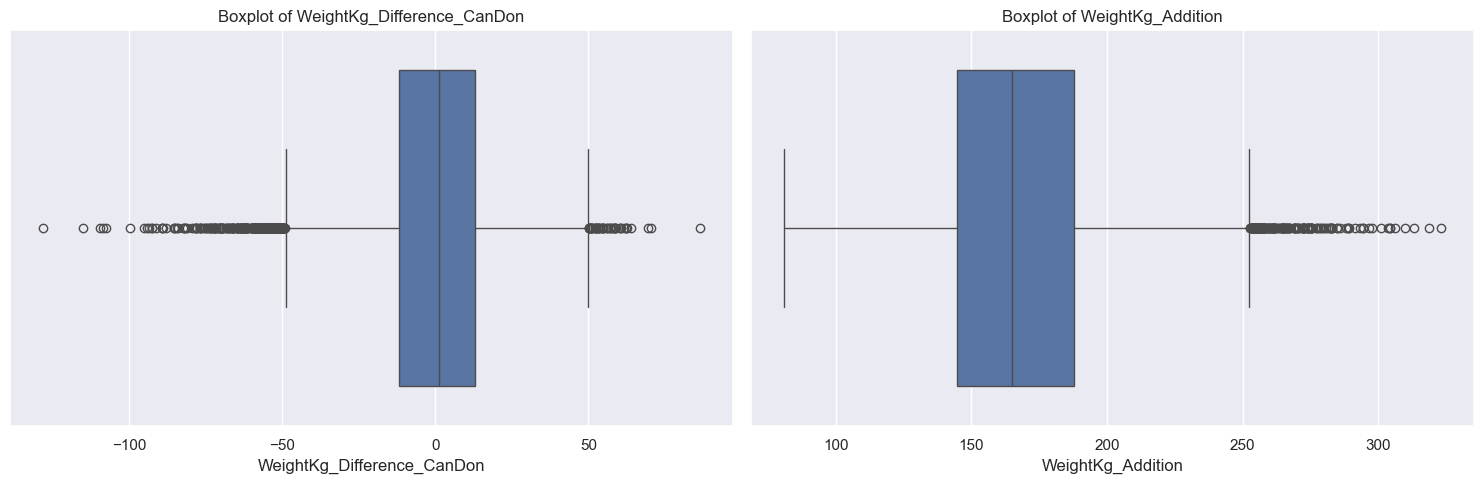

In [82]:
uv.plotBoxPlot(df, new, orientation='h')

### Remove Features

In [83]:
# remove features 
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 1 row(s) from df_can DataFrame.
Remove 1 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 1 row(s) from df_nominal DataFrame.
Remove 1 row(s) from df_numeric DataFrame.
Remove 1 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Age_Listing_CAN', 'LungPO2_Done_DON']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 261
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 259


### Save

In [84]:
# heart dataset
uf.writeToFile(df, 'Clean_Heart_Engineer',path='../Data/', format='pkl')

# heart label
uf.writeToFile(df_label, 'Clean_Label_Engineer',path='../Data/', format='pkl')

# heart candidate
uf.writeToFile(df_can, 'Clean_CAN_Engineer', format='pkl')

# heart donor
uf.writeToFile(df_don, 'Clean_DON_Engineer', format='pkl')

# heart both
uf.writeToFile(df_both, 'Clean_BOTH_Engineer', format='pkl')

# heart nominal
uf.writeToFile(df_nominal, 'Clean_Nominal_Engineer', format='pkl')

# heart ordinal
uf.writeToFile(df_ordinal, 'Clean_Ordinal_Engineer', format='pkl')

# heart numeric
uf.writeToFile(df_numeric, 'Clean_Numeric_Engineer', format='pkl')

# heart drop
uf.writeToFile(df_drop, 'Clean_Drop_Engineer', format='pkl')

# heart new
uf.writeToFile(df_new, 'Clean_New_Engineer', format='pkl')

# heart object
uf.writeToFile(df_object, 'Clean_Object_Engineer', format='pkl')

# heart unknown
uf.writeToFile(df_unknown, 'Clean_Unknown_Engineer', format='pkl')

# heart date
uf.writeToFile(df_date, 'Clean_Date_Engineer', format='pkl')

# heart data dictionary
uf.writeToFile(df_dict, 'Clean_Dictionary_Engineer', format='pkl')

16,126 records written to ../Data/Clean_Heart_Engineer.pkl
15 records written to ../Data/Clean_Label_Engineer.pkl
131 records written to ../Data/Clean_CAN_Engineer.pkl
96 records written to ../Data/Clean_DON_Engineer.pkl
21 records written to ../Data/Clean_BOTH_Engineer.pkl
167 records written to ../Data/Clean_Nominal_Engineer.pkl
21 records written to ../Data/Clean_Ordinal_Engineer.pkl
70 records written to ../Data/Clean_Numeric_Engineer.pkl
25 records written to ../Data/Clean_Drop_Engineer.pkl
29 records written to ../Data/Clean_New_Engineer.pkl
0 records written to ../Data/Clean_Object_Engineer.pkl
0 records written to ../Data/Clean_Unknown_Engineer.pkl
0 records written to ../Data/Clean_Date_Engineer.pkl
302 records written to ../Data/Clean_Dictionary_Engineer.pkl
